In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Sumber Dataset
link : https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/code

# EDA

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/UAS-DataScience/cardio_train_bersih.csv')

# Jumlah baris dan kolom
print("Jumlah baris dan kolom:")
display(df.shape)

# Tipe data setiap kolom
print("\nTipe data setiap kolom:")
display(df.dtypes)

# Cek nilai yang hilang (missing values)
print("\nJumlah nilai yang hilang per kolom:")
display(df.isnull().sum())

# Cek duplikat data
print("\nJumlah baris duplikat:")
display(df.duplicated().sum())

Jumlah baris dan kolom:


(70000, 13)


Tipe data setiap kolom:


,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64



Jumlah nilai yang hilang per kolom:


,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0



Jumlah baris duplikat:


np.int64(0)

In [4]:
# Deskripsi Statistik Fitur Numerik

# Pilih kolom numerik yang akan dianalisis
numeric_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Tampilkan deskripsi statistik
print("Deskripsi statistik fitur numerik:")
display(df[numeric_cols].describe())

Deskripsi statistik fitur numerik:


,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414
std,2467.251667,8.210126,14.395757,154.011419,188.472530
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000


In [5]:
# Pemetaan & Konversi Label Kategorikal

# Membuat kolom label baru tanpa mengubah data asli
df['gender_label'] = df['gender'].map({1: 'Perempuan', 2: 'Laki-laki'})
df['cholesterol_label'] = df['cholesterol'].map({1: 'Normal', 2: 'Tinggi', 3: 'Sangat Tinggi'})
df['gluc_label'] = df['gluc'].map({1: 'Normal', 2: 'Tinggi', 3: 'Sangat Tinggi'})
df['cardio_label'] = df['cardio'].map({0: 'Sehat', 1: 'Penyakit Jantung'})

# Tampilkan contoh hasil mapping
display(df[['gender', 'gender_label', 'cholesterol', 'cholesterol_label',
          'gluc', 'gluc_label', 'cardio', 'cardio_label']].head())

,gender,gender_label,cholesterol,cholesterol_label,gluc,gluc_label,cardio,cardio_label
0,2,Laki-laki,1,Normal,1,Normal,0,Sehat
1,1,Perempuan,3,Sangat Tinggi,1,Normal,1,Penyakit Jantung
2,1,Perempuan,3,Sangat Tinggi,1,Normal,1,Penyakit Jantung
3,2,Laki-laki,1,Normal,1,Normal,1,Penyakit Jantung
4,1,Perempuan,1,Normal,1,Normal,0,Sehat


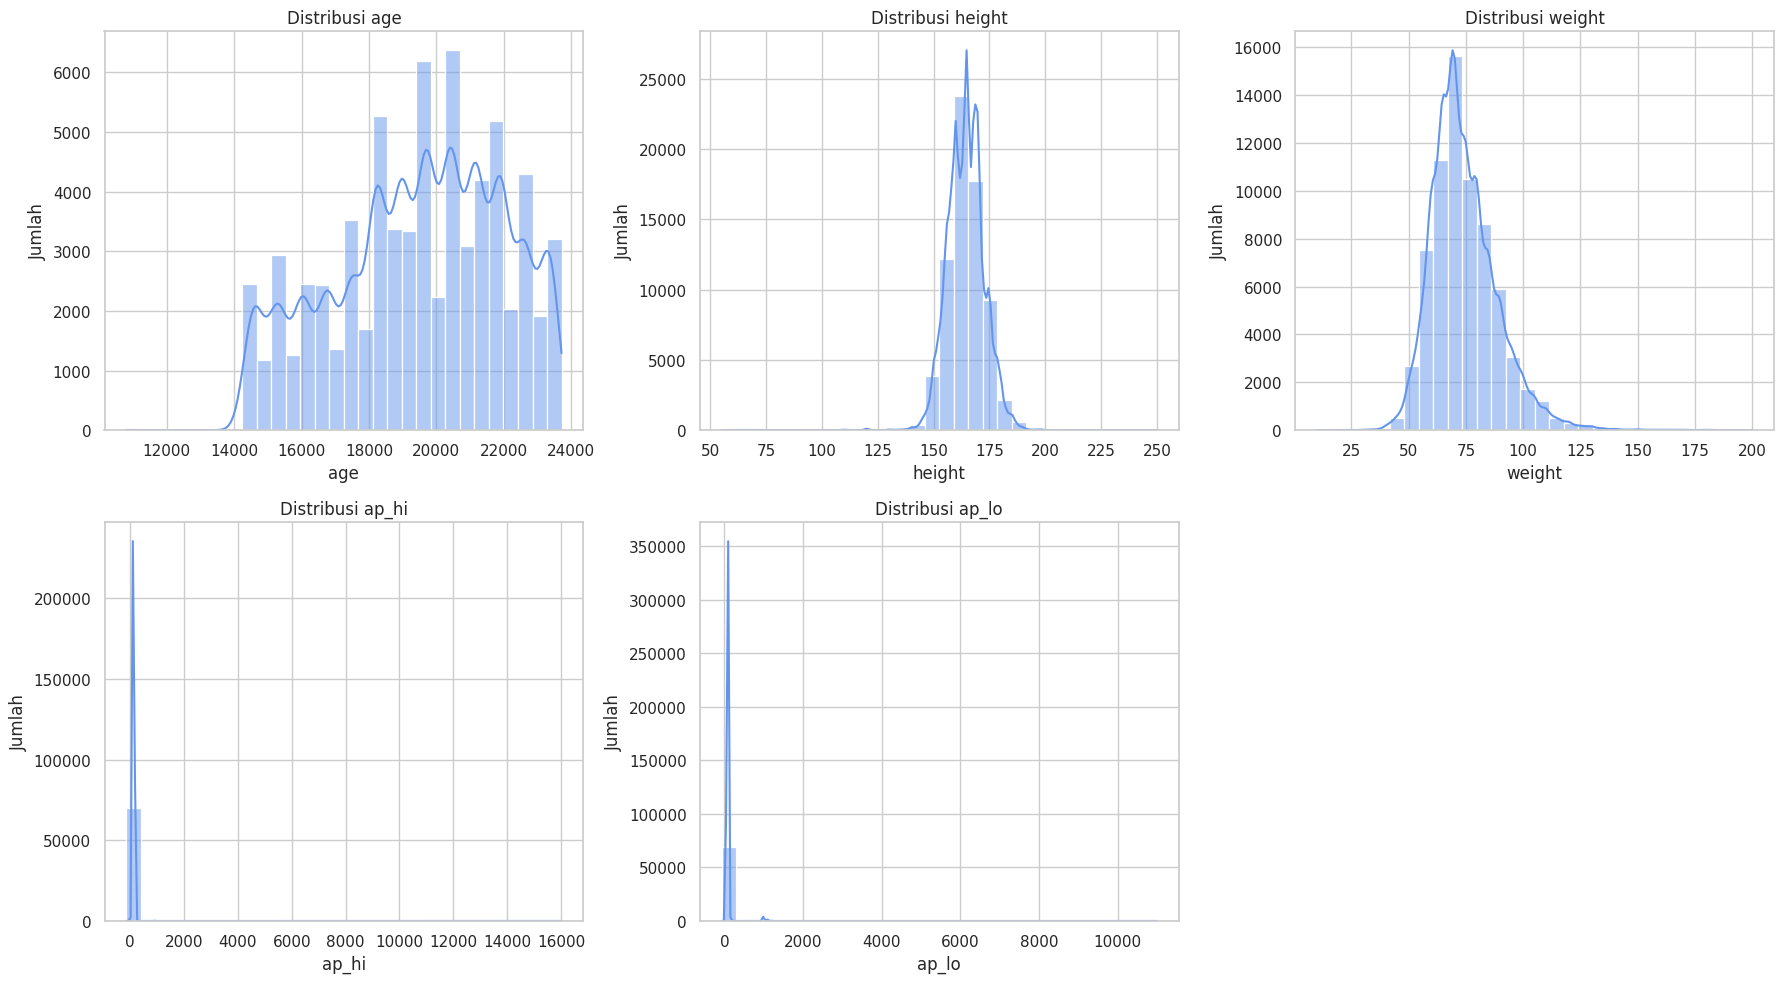

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Distribusi Fitur Numerik

# Daftar fitur numerik utama
numeric_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Set gaya visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))

# Loop dan plot distribusi tiap fitur numerik
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='cornflowerblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

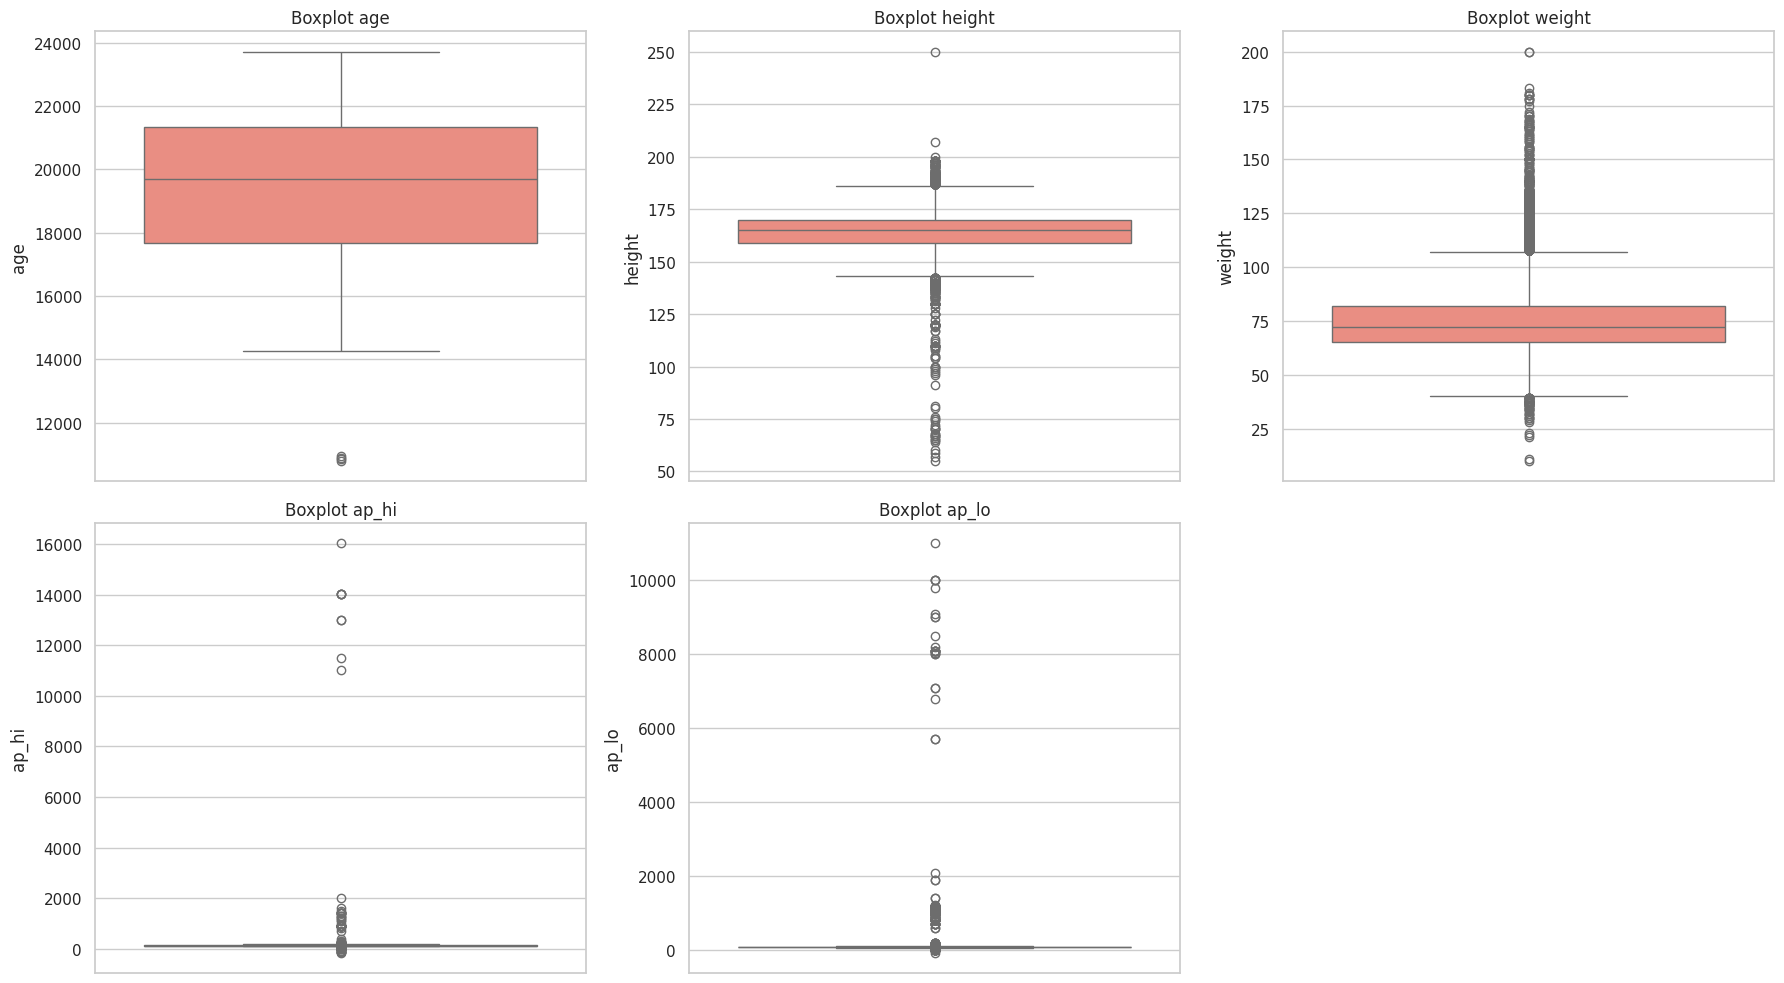

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Deteksi Outlier dengan Boxplot

# Daftar fitur numerik utama
numeric_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Set ukuran dan gaya
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

# Loop dan buat boxplot untuk tiap kolom
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], color='salmon')
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

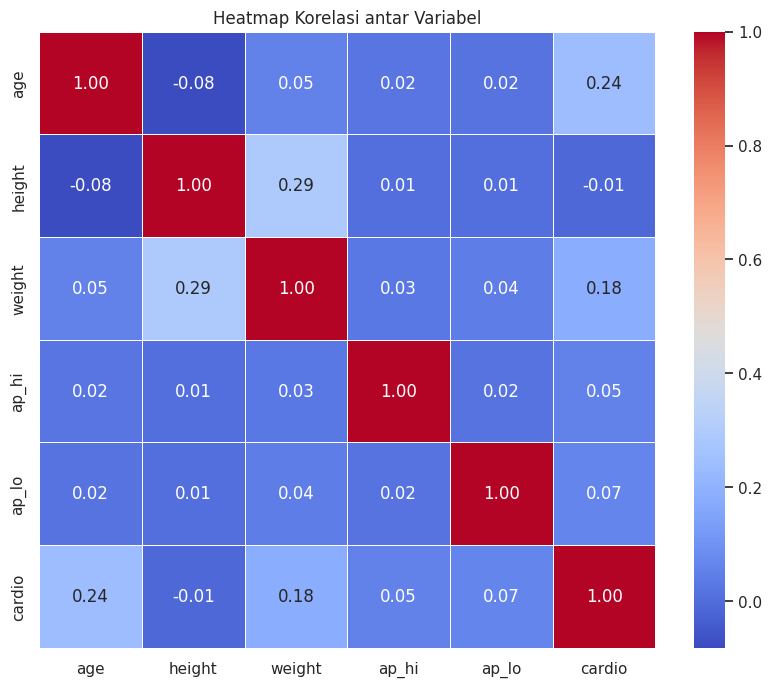

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi antar Variabel Numerik

# Pilih fitur numerik utama + target
corr_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio']

# Hitung korelasi Pearson
corr_matrix = df[corr_cols].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Heatmap Korelasi antar Variabel')
plt.show()

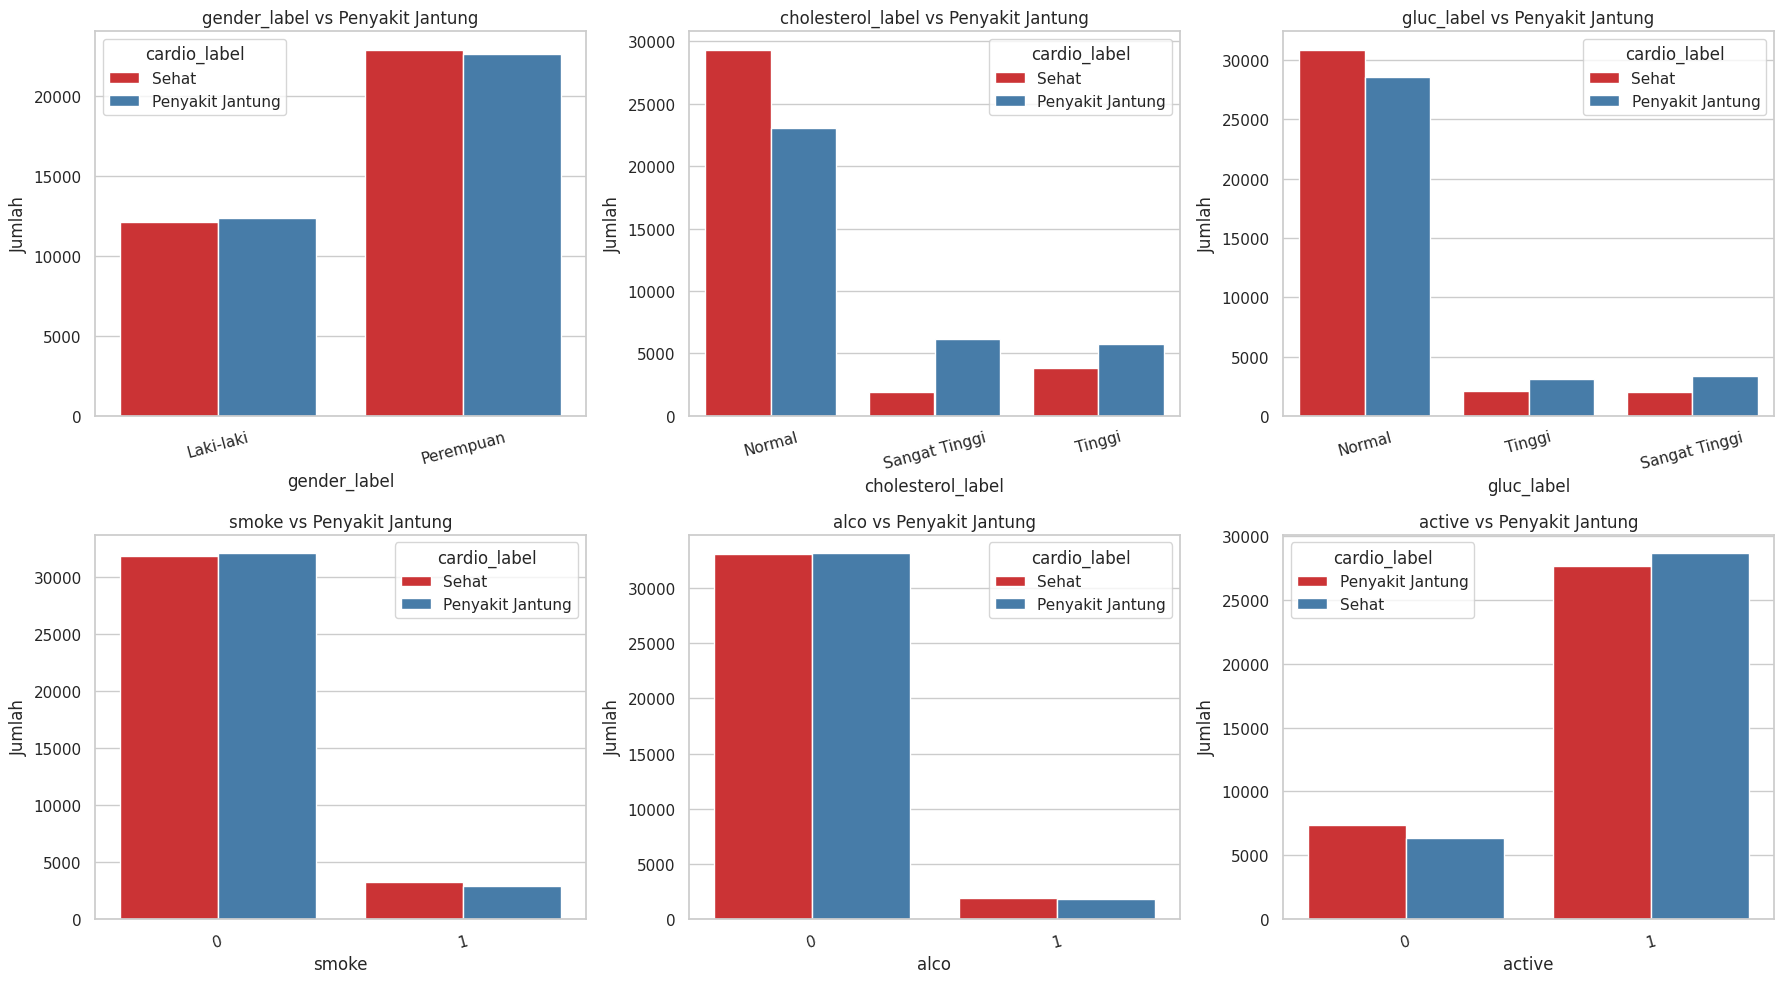

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis Fitur Kategorikal terhadap Target

# Fitur kategorikal yang akan dianalisis terhadap target
categorical_cols = ['gender_label', 'cholesterol_label', 'gluc_label', 'smoke', 'alco', 'active']

# Set gaya visual
sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))

# Buat countplot per fitur
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, hue='cardio_label', palette='Set1')
    plt.title(f'{col} vs Penyakit Jantung')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

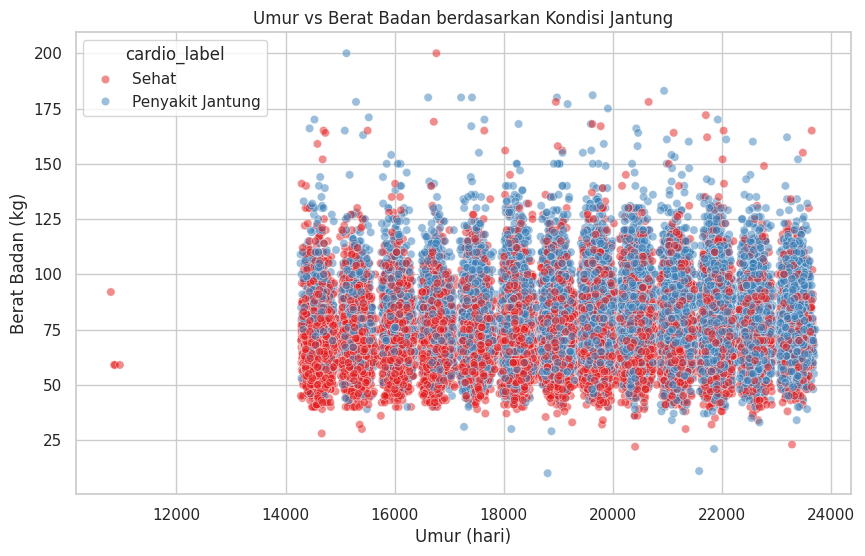

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Umur vs Berat Badan terhadap Target
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='weight', hue='cardio_label', alpha=0.5, palette='Set1')
plt.title('Umur vs Berat Badan berdasarkan Kondisi Jantung')
plt.xlabel('Umur (hari)')
plt.ylabel('Berat Badan (kg)')
plt.show()

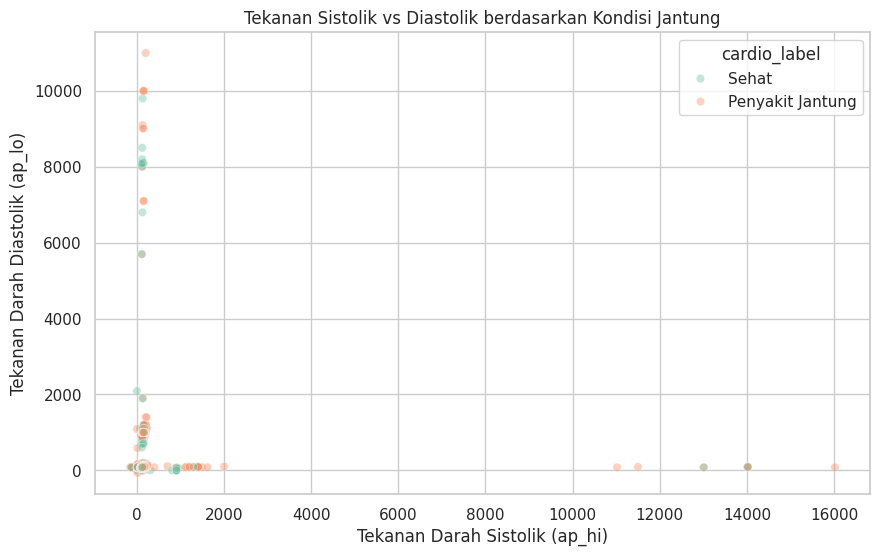

In [11]:
# ap_hi vs ap_lo terhadap Target
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ap_hi', y='ap_lo', hue='cardio_label', alpha=0.4, palette='Set2')
plt.title('Tekanan Sistolik vs Diastolik berdasarkan Kondisi Jantung')
plt.xlabel('Tekanan Darah Sistolik (ap_hi)')
plt.ylabel('Tekanan Darah Diastolik (ap_lo)')
plt.show()

/tmp/ipython-input-12-3699285690.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cardio_label', palette='pastel')


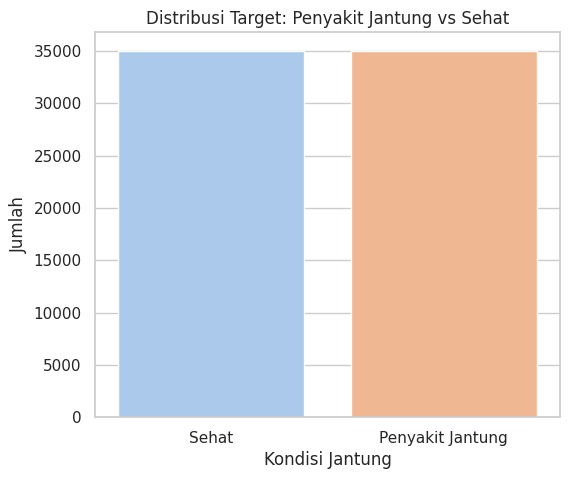

Proporsi Kelas Target (cardio):
cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis Distribusi Label Target
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='cardio_label', palette='pastel')
plt.title('Distribusi Target: Penyakit Jantung vs Sehat')
plt.xlabel('Kondisi Jantung')
plt.ylabel('Jumlah')
plt.show()

# Rasio proporsi (opsional)
proporsi = df['cardio'].value_counts(normalize=True)
print("Proporsi Kelas Target (cardio):")
print(proporsi)

# PRE-PROCESSING

In [13]:
df_rf = df.copy()

In [14]:
# Buat Kolom age_years
df_rf['age_years'] = (df_rf['age'] // 365).astype(int)

In [15]:
# Bersihkan Outlier
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"{column}: {df.shape[0] - cleaned_df.shape[0]} baris dihapus sebagai outlier.")
    return cleaned_df

for col in ['height', 'weight', 'ap_hi', 'ap_lo']:
    df_rf = remove_outliers_iqr(df_rf, col)

height: 519 baris dihapus sebagai outlier.
weight: 1758 baris dihapus sebagai outlier.
ap_hi: 1309 baris dihapus sebagai outlier.
ap_lo: 3909 baris dihapus sebagai outlier.


In [16]:
# Pilih Fitur
features = [
    'age_years', 'height', 'weight',
    'ap_hi', 'ap_lo', 'gender',
    'cholesterol', 'gluc',
    'smoke', 'alco', 'active'
]
target = 'cardio'

In [17]:
# Pisahkan Fitur & Target
X = df_rf[features]
y = df_rf[target]

In [18]:
# Split Data (Train-Test Split)
# Gunakan 80% untuk training, 20% untuk testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pemodelan dan Pembelajaran Mesin


## **RANDOM FOREST**

In [19]:
# Import Library & Buat Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi dan Latih Model
rf_model = RandomForestClassifier(
    n_estimators=100,        # jumlah pohon
    random_state=42,
    n_jobs=-1                # paralel semua core
)

rf_model.fit(X_train, y_train)

# Prediksi Data Uji
y_pred = rf_model.predict(X_test)

### **Validasi dan Evaluasi Model**

In [20]:
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.4f}")

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Sehat", "Penyakit Jantung"]))

Akurasi: 0.6985

 Classification Report:
                  precision    recall  f1-score   support

           Sehat       0.70      0.71      0.70      6327
Penyakit Jantung       0.70      0.69      0.69      6174

        accuracy                           0.70     12501
       macro avg       0.70      0.70      0.70     12501
    weighted avg       0.70      0.70      0.70     12501



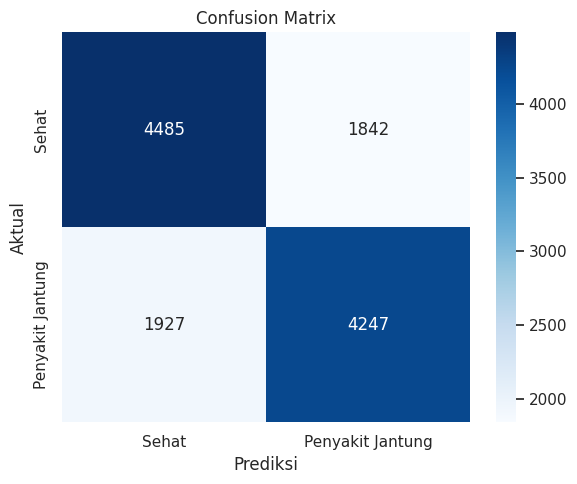

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Sehat", "Penyakit Jantung"],
            yticklabels=["Sehat", "Penyakit Jantung"])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

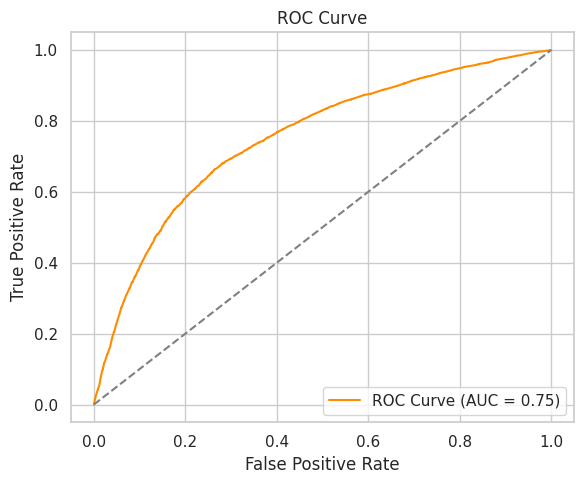

In [22]:
# ROC Curve & AUC Score
# Proba prediksi hanya diperlukan untuk kurva ROC
y_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## **LOGISTIC REGRESSION**

In [23]:
from sklearn.preprocessing import StandardScaler

# Scaling Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

# Training Model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

###**Validasi dan Evaluasi Model**

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Prediksi
y_pred_lr = lr_model.predict(X_test_scaled)

# Akurasi
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Akurasi Logistic Regression: {accuracy_lr:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=["Sehat", "Penyakit Jantung"]))

Akurasi Logistic Regression: 0.7199

Classification Report:
                  precision    recall  f1-score   support

           Sehat       0.70      0.78      0.74      6327
Penyakit Jantung       0.75      0.65      0.70      6174

        accuracy                           0.72     12501
       macro avg       0.72      0.72      0.72     12501
    weighted avg       0.72      0.72      0.72     12501



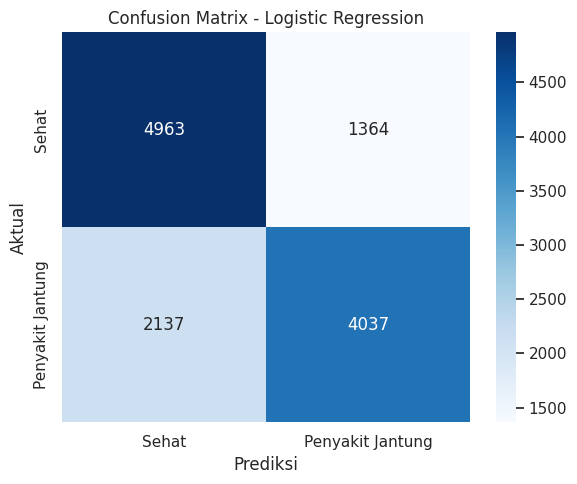

In [26]:
# Confusion Matrix Visual
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Sehat", "Penyakit Jantung"],
            yticklabels=["Sehat", "Penyakit Jantung"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

## **XGBOOST**

In [27]:
!pip install xgboost

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi dan training model
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

### **Validasi dan Evaluasi Model**

In [29]:
# Prediksi
y_pred_xgb = xgb_model.predict(X_test)

# Akurasi
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Akurasi XGBoost: {accuracy_xgb:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=["Sehat", "Penyakit Jantung"]))

Akurasi XGBoost: 0.7282

Classification Report:
                  precision    recall  f1-score   support

           Sehat       0.71      0.77      0.74      6327
Penyakit Jantung       0.75      0.68      0.71      6174

        accuracy                           0.73     12501
       macro avg       0.73      0.73      0.73     12501
    weighted avg       0.73      0.73      0.73     12501



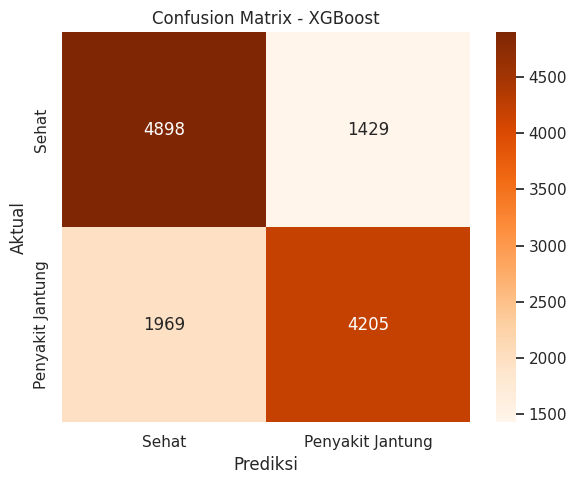

In [30]:
# Confusion Matrix Visual
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=["Sehat", "Penyakit Jantung"],
            yticklabels=["Sehat", "Penyakit Jantung"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

# **PERBANDINGAN**

In [31]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=200, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

results = {}

for name, model in models.items():
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.7199
Random Forest Accuracy: 0.6983
XGBoost Accuracy: 0.7282
[LightGBM] [Info] Number of positive: 24696, number of negative: 25308
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 50004, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493880 -> initscore=-0.024479
[LightGBM] [Info] Start training from score -0.024479
LightGBM Accuracy: 0.7283
CatBoost Accuracy: 0.7281


## **KNN**

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Inisialisasi KNN, coba dengan k = 5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### **Validasi dan Evaluasi Model**

In [35]:
y_pred_knn = knn_model.predict(X_test_scaled)

# Akurasi
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Akurasi KNN: {acc_knn:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=["Sehat", "Penyakit Jantung"]))

Akurasi KNN: 0.6883

Classification Report:
                  precision    recall  f1-score   support

           Sehat       0.69      0.70      0.70      6327
Penyakit Jantung       0.69      0.67      0.68      6174

        accuracy                           0.69     12501
       macro avg       0.69      0.69      0.69     12501
    weighted avg       0.69      0.69      0.69     12501



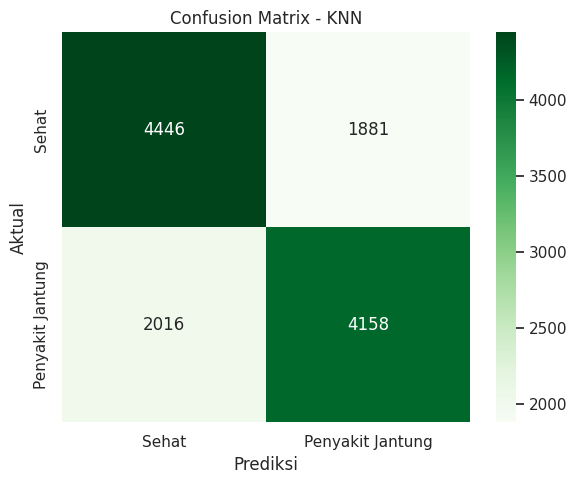

In [36]:
# Confusion Matrix Visual
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Sehat", "Penyakit Jantung"],
            yticklabels=["Sehat", "Penyakit Jantung"])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

# **RETRAIN XGBOOST**

In [37]:
# Tambah fitur baru

df['age_years'] = (df['age'] // 365).astype(int)
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['mean_arterial_pressure'] = (df['ap_hi'] + 2 * df['ap_lo']) / 3

In [38]:
# Definisikan fitur dan target
features = [
    'age_years', 'gender', 'height', 'weight',
    'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
    'smoke', 'alco', 'active',
    'bmi', 'pulse_pressure', 'mean_arterial_pressure'
]
X = df[features]
y = df['cardio']

In [39]:
# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [40]:
# Hyperparameter Tuning untuk XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

grid_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'subsample': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


In [41]:
# Evaluasi Model Terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 0.7335
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      7004
           1       0.75      0.70      0.72      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



# **SIMPAN MODEL XGBOOST** - FIX PAKAI XGBOOST



In [55]:
import joblib

# Misalnya model terbaik disimpan dari grid_search
best_model = grid_search.best_estimator_
joblib.dump(best_model, '/content/drive/MyDrive/UAS-DataScience/xgb_model_best.pkl')


['/content/drive/MyDrive/UAS-DataScience/xgb_model_best.pkl']

In [52]:
# Simpan data
df.to_csv('/content/drive/MyDrive/UAS-DataScience/cardio-fix.csv', index=False)

print("Model dan data berhasil disimpan!")

Model dan data berhasil disimpan!
